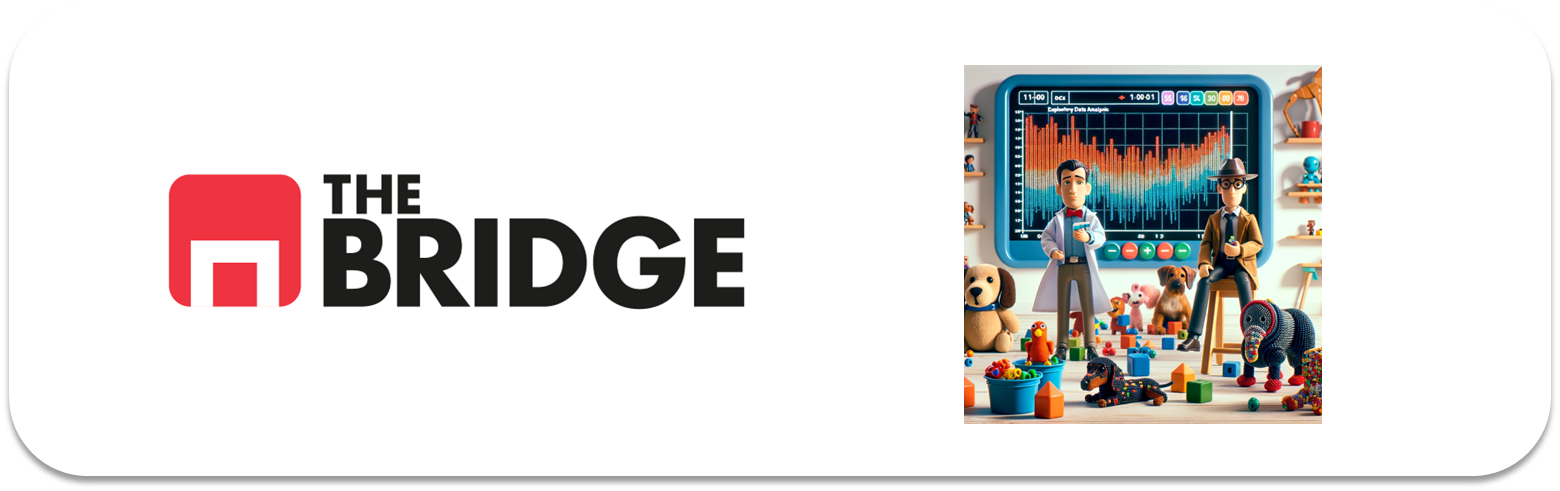

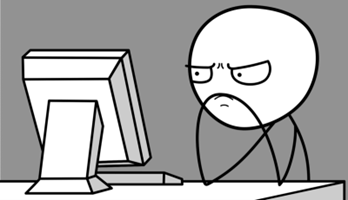

Para ejercitarte y afianzar lo aprendido sobre análisis multivariante, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos se subirá a lo largo del sprint.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from bootcampviztools import (
    plot_categorical_relationship_fin,
    plot_combined_graphs,
    grafico_dispersion_con_correlacion,
    bubble_plot
)

### Ejercicio 1

Carga el dataset de admisiones que conoces de la unidad anterior y que se encuentra en la ruta "./data/admission_data.csv", deshazte de las columnas innecesarias

In [4]:
df = pd.read_csv("./data/admission_data.csv")
df.drop(["Unnamed: 0", "Year"], axis=1, inplace=True)

### Ejercicio 2

Realiza los análisis multivariante que consideres necesarios para contestar apoyándote en los datos a las preguntas: ¿Existe algún departamenteo específico donde pudieramos hablar de discriminación?¿Están estos resultados en consonancia con lo obtenido en el análisis bivariante de admisiones y género? 

Análisis para mujeres:


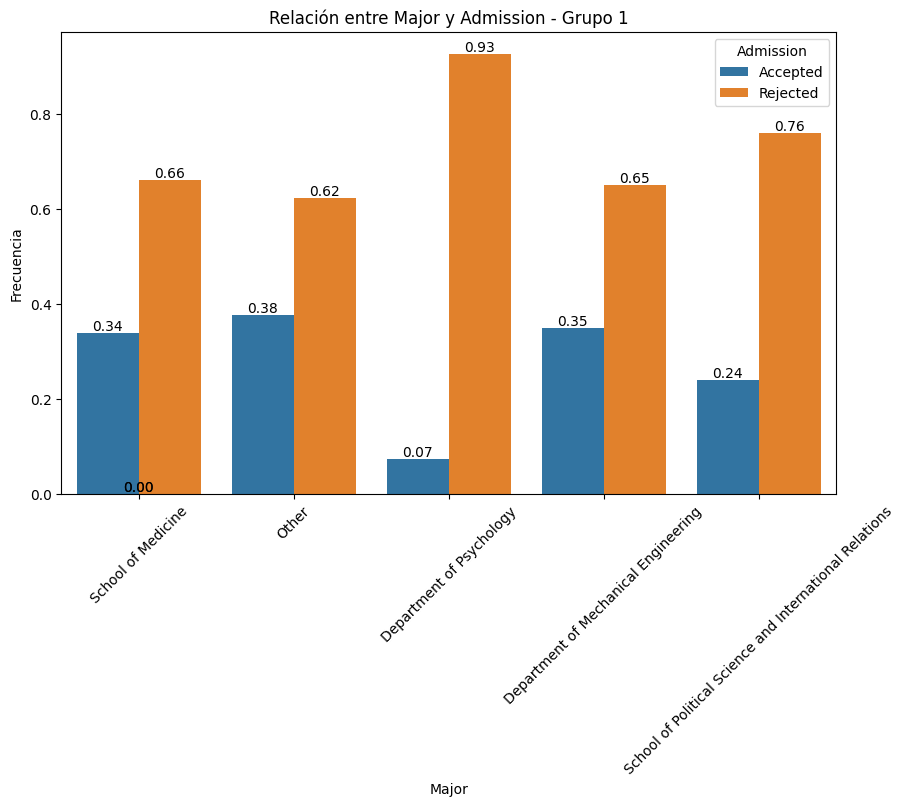

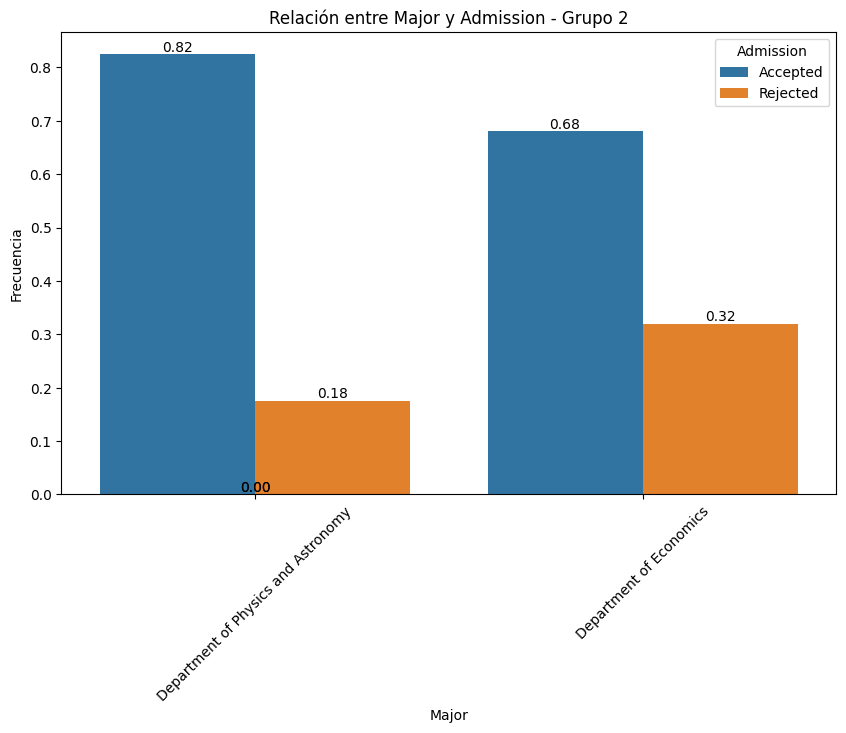

Análisis para hombres:


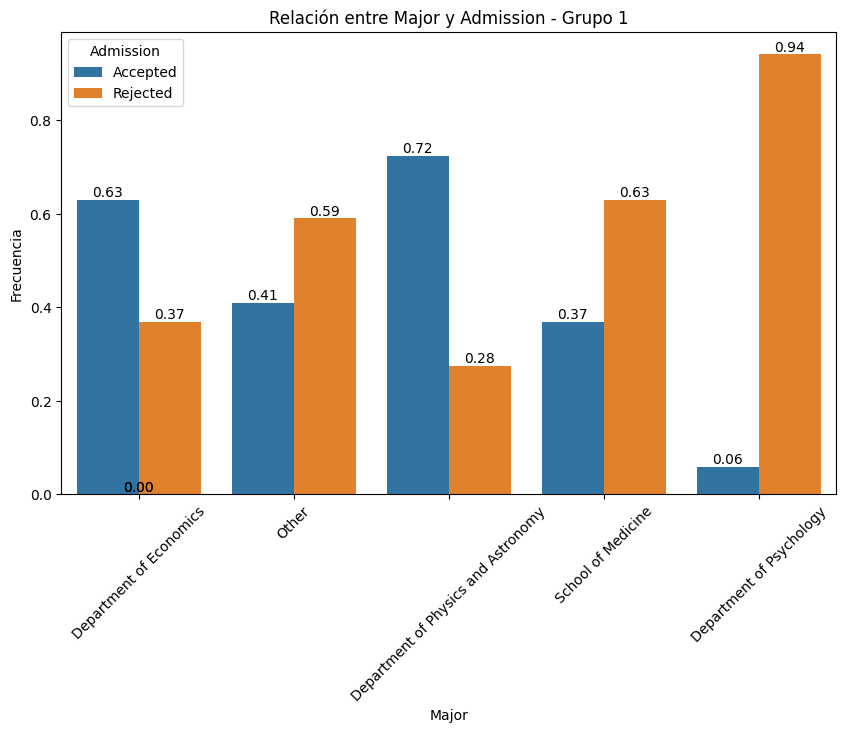

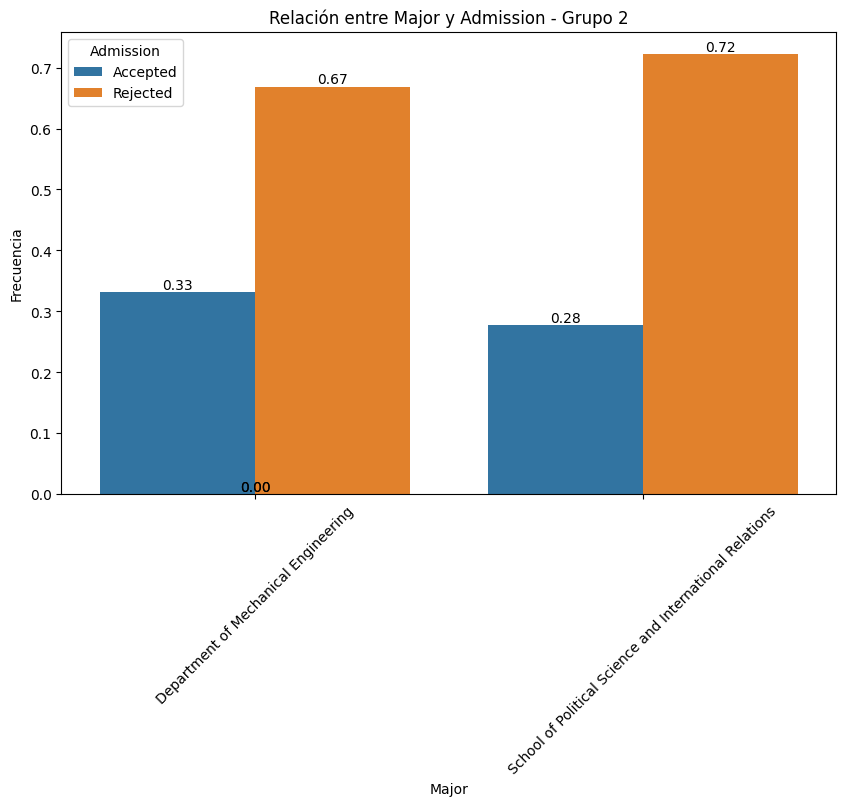

In [10]:
df_female = df[df["Gender"]=="F"][["Major", "Admission"]]
df_male = df[df["Gender"]=="M"][["Major", "Admission"]]

print("Análisis para mujeres:")
plot_categorical_relationship_fin(df_female, "Major", "Admission", relative_freq=True, show_values=True)

print("Análisis para hombres:")
plot_categorical_relationship_fin(df_male, "Major", "Admission", relative_freq=True, show_values=True)

### Ejercicio 3

Carga el dataset de propinas (tips) que conoces de la unidad anterior y que se encuentra en la ruta "./data/tips.csv", deshazte de las columnas innecesarias

In [15]:
df_tips = pd.read_csv("./data/tips.csv")
df_tips.drop(["Unnamed: 0"], axis=1, inplace=True)

### Ejercicio 4

Carga el dataset de accidentes que conoces de la unidad anterior y que se encuentra en la ruta "./data/car_crashes.csv", deshazte de las columnas innecesarias y renombra la que contiene las iniciales de los estados a "state"

In [20]:
df_cars = pd.read_csv("./data/car_crashes.csv", sep="|")
df_cars.drop(["Unnamed: 0"], axis=1, inplace=True)
df_cars.rename(columns={"abbrev": "state"}, inplace=True)

### Ejercicio 5

Realiza una análisis de todas las posibles correlaciones dos a dos, de forma numérica primero y luego empleado un heatmap y un pairplot de seaborn. ¿Qué variables tienen o aparentemente tienen una mayor correlación con "total"?

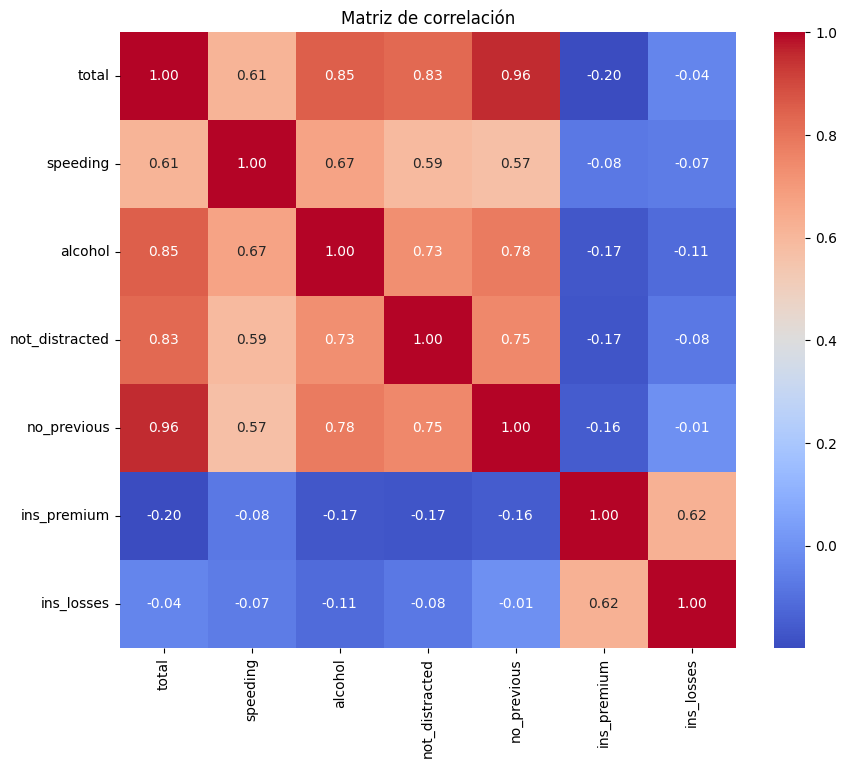

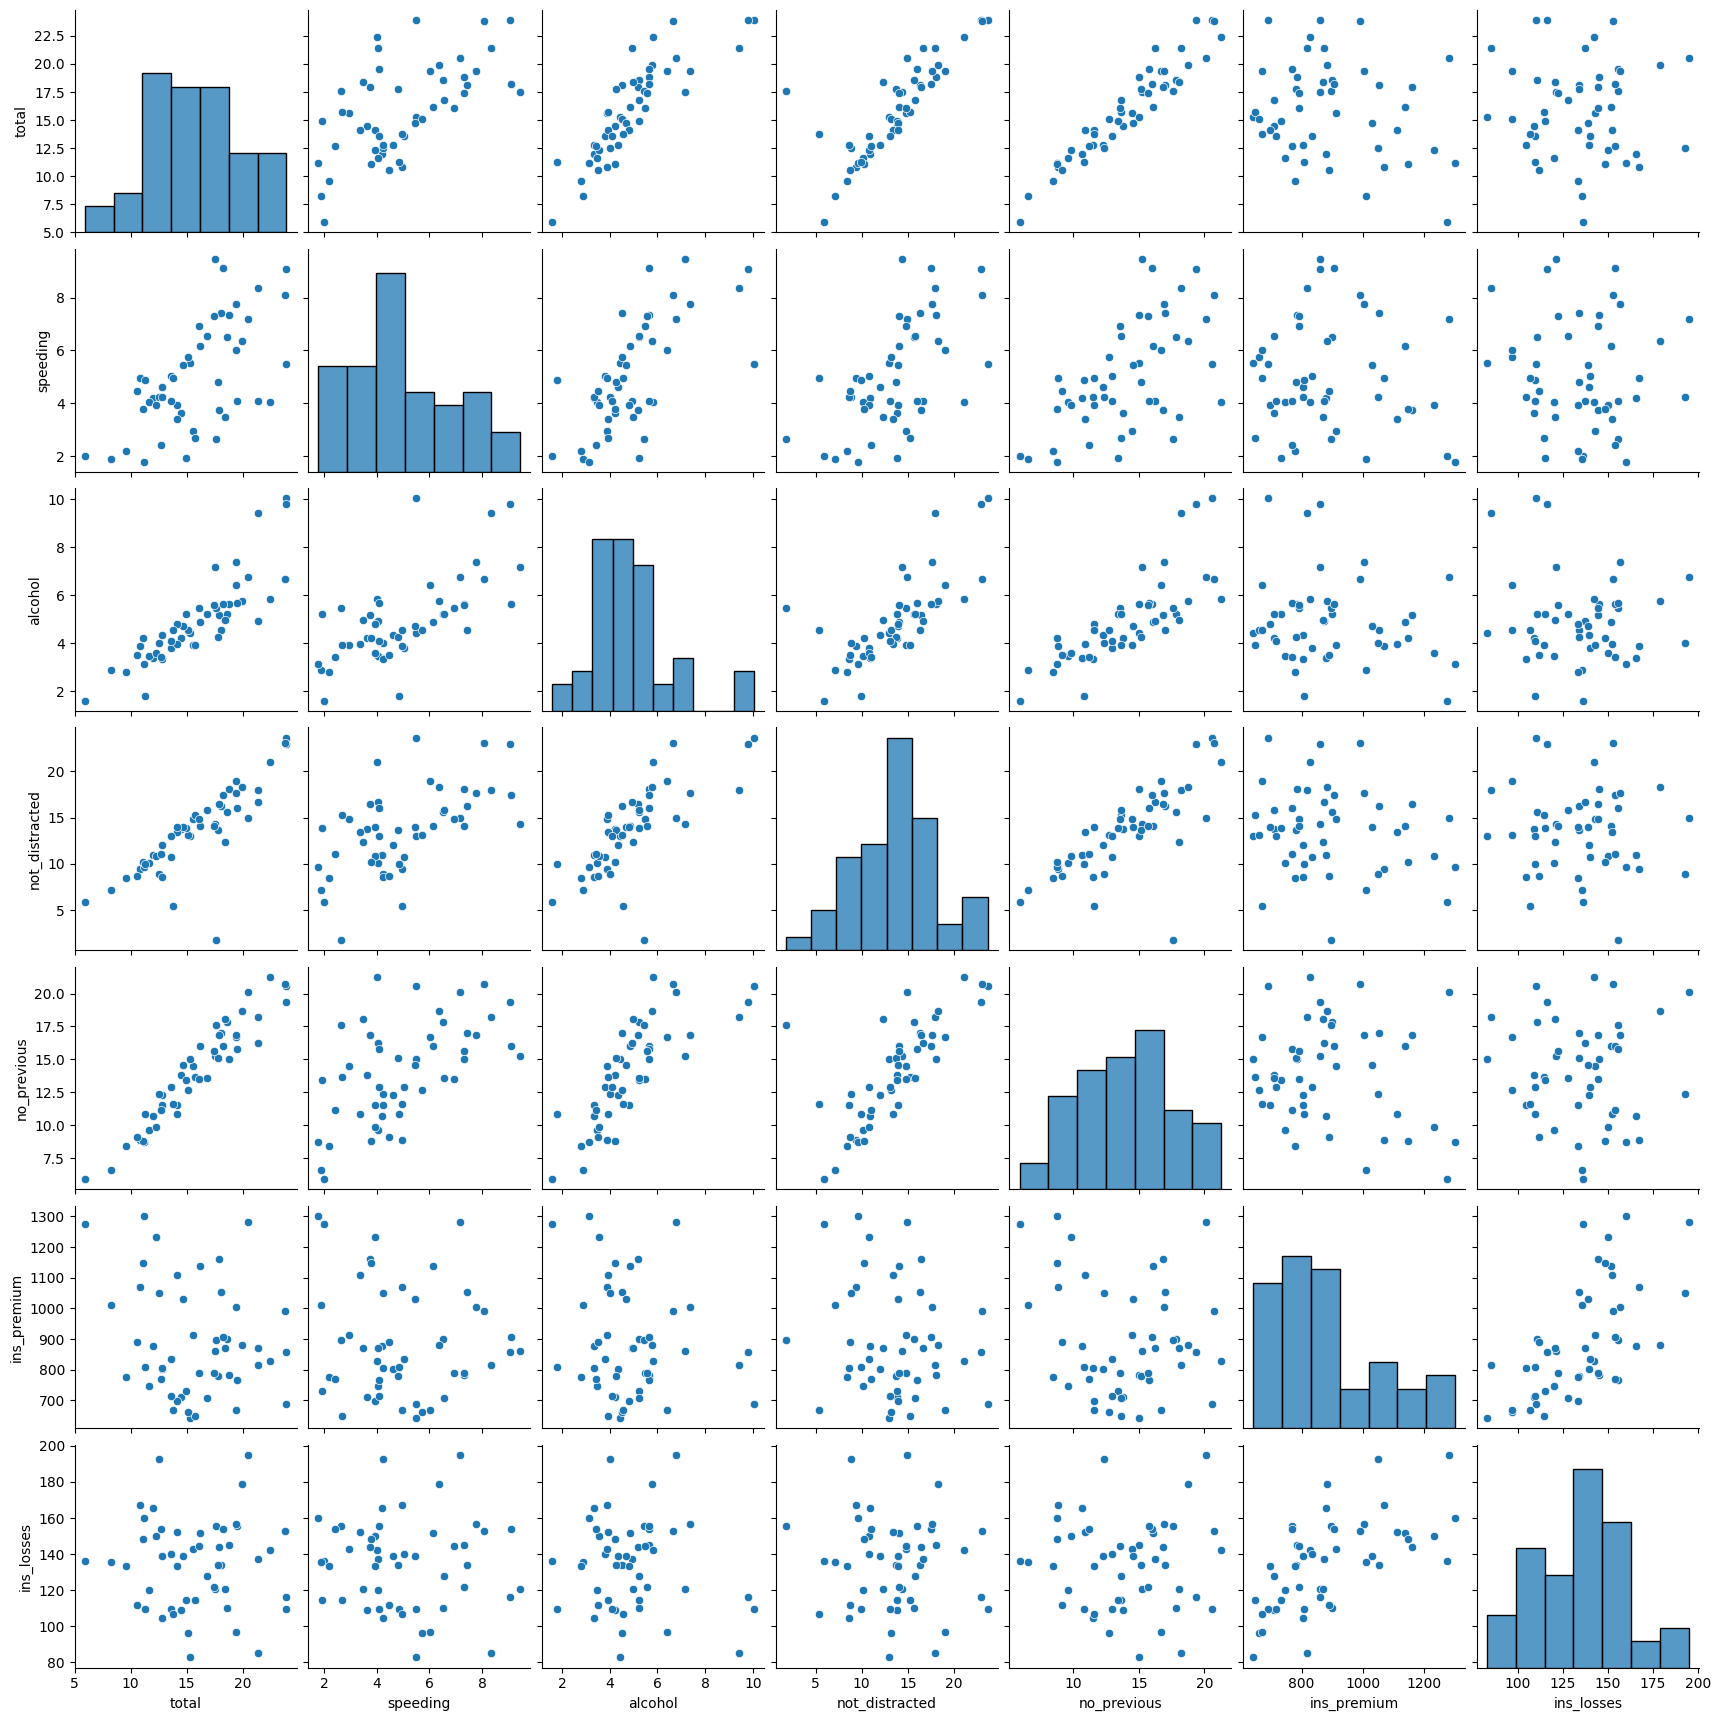

In [28]:
# Correlación numéricca
corr_num = df_cars[df_cars.columns.to_list()[:-1]].corr()

# Heatmap de Seaborn
plt.figure(figsize=(10,8))
sns.heatmap(corr_num, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Matriz de correlación")
plt.show()

# Pairplot de Seaborn

sns.pairplot(df_cars[df_cars.columns.to_list()[:-1]])
plt.show()

- Las variables que tienen o aparentemente tienen una mayor correlación con "total" son "speedingg" y "alcohol".

### Ejercicio 6

Realiza un análisis multivariante entre las variables numéricas "total", "alcohol", "speeding". ¿Puedes sacar alguna conclusión interesante?

(3, 2)


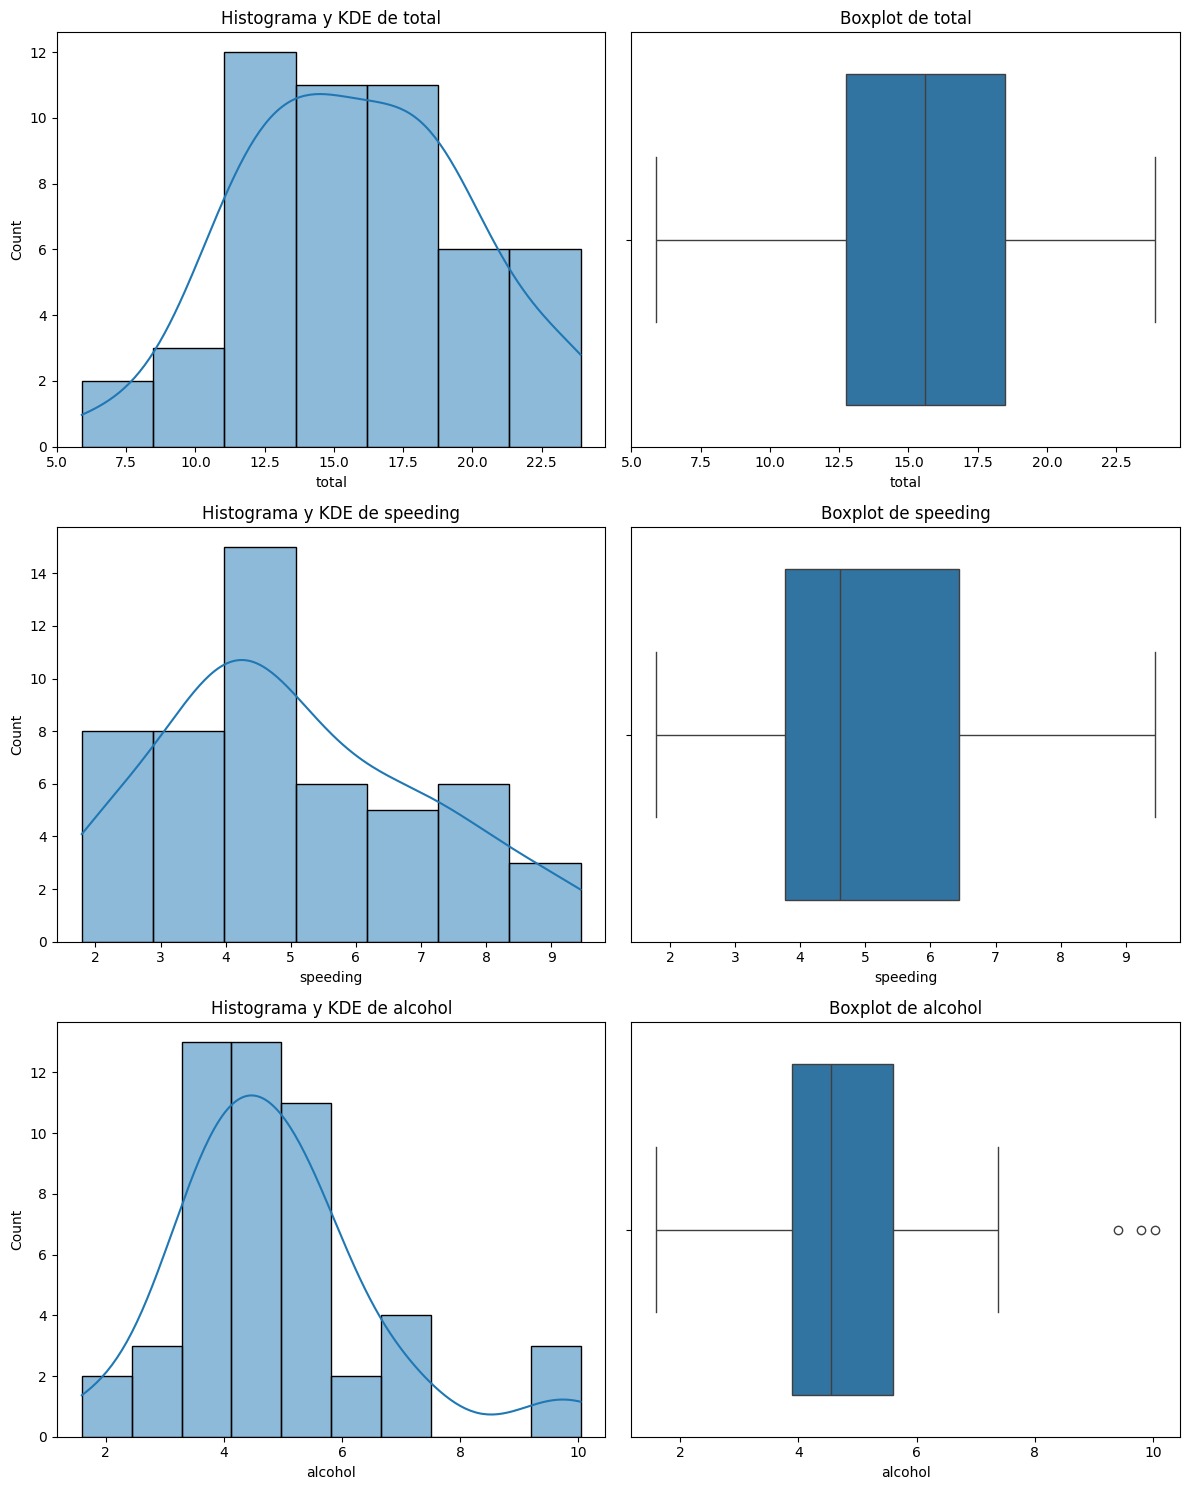

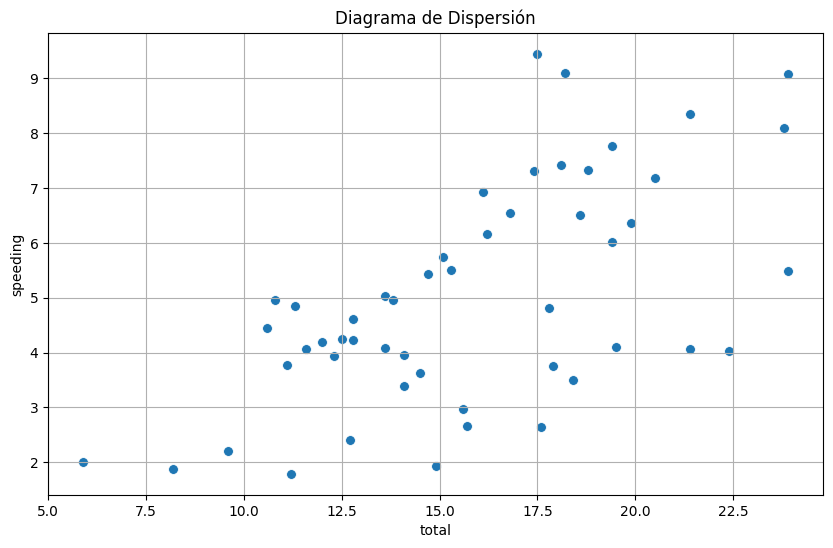

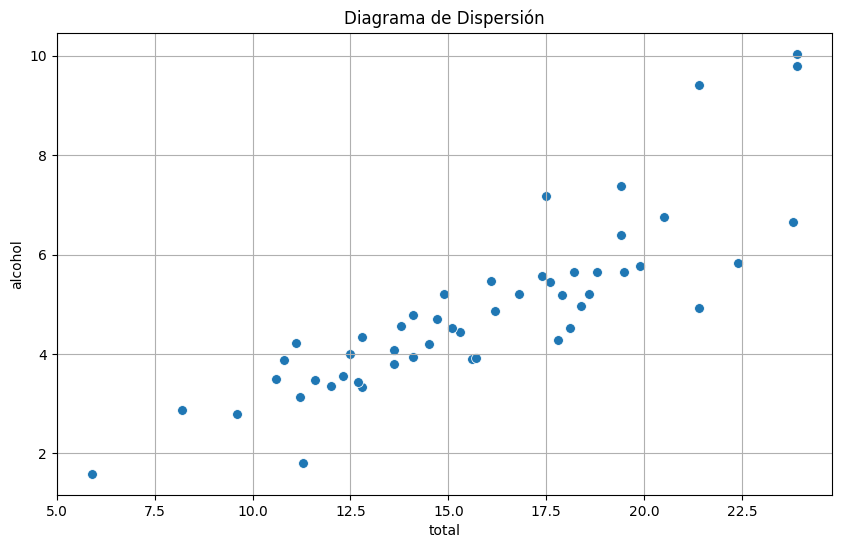

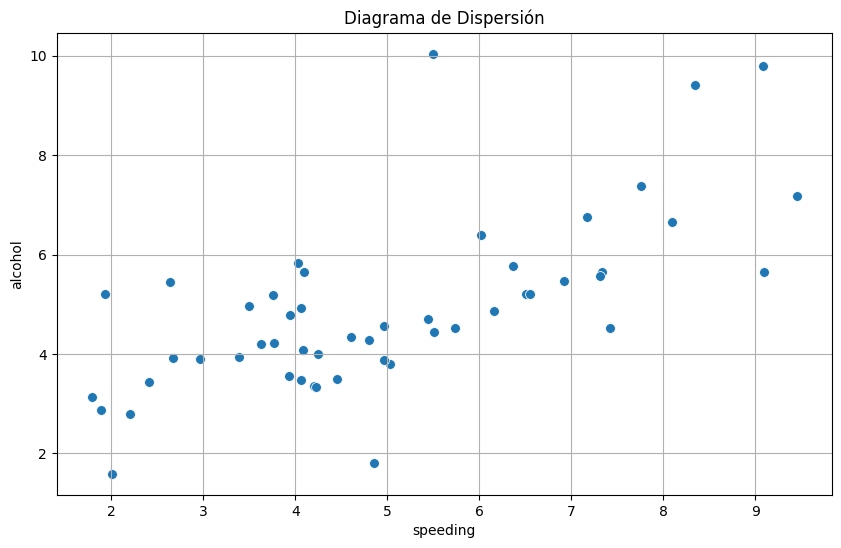

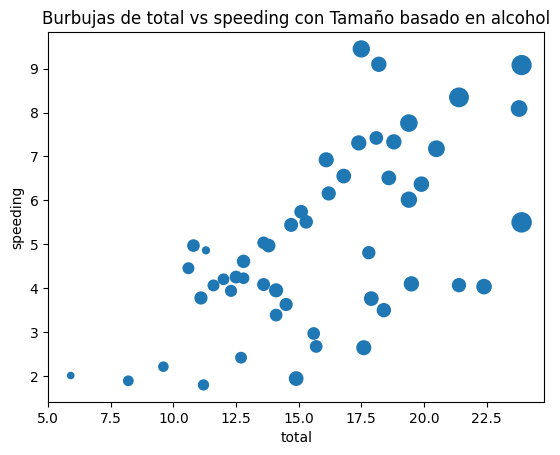

In [35]:
plot_combined_graphs(df_cars, ["total", "speeding", "alcohol"])

grafico_dispersion_con_correlacion(df_cars, "total", "speeding")
grafico_dispersion_con_correlacion(df_cars, "total", "alcohol")
grafico_dispersion_con_correlacion(df_cars, "speeding", "alcohol")

bubble_plot(df_cars, "total", "speeding", "alcohol", scale=0.05)